# Data Acuisition

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Linear Regression

In [5]:
df = df.drop('Unnamed: 0', axis=1)  # Drop the index column if not needed

# Linear Regression
# Using only one feature (TV) for simplicity
X = df[['TV']]
y = df['sales']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        02:06:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Multiple Linear Regression

In [15]:
# Multiple Regression
X = df[['TV', 'radio', 'newspaper']]

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model_multiple = sm.OLS(y, X).fit()

# Print the summary of the multiple regression
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        22:06:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Visualization

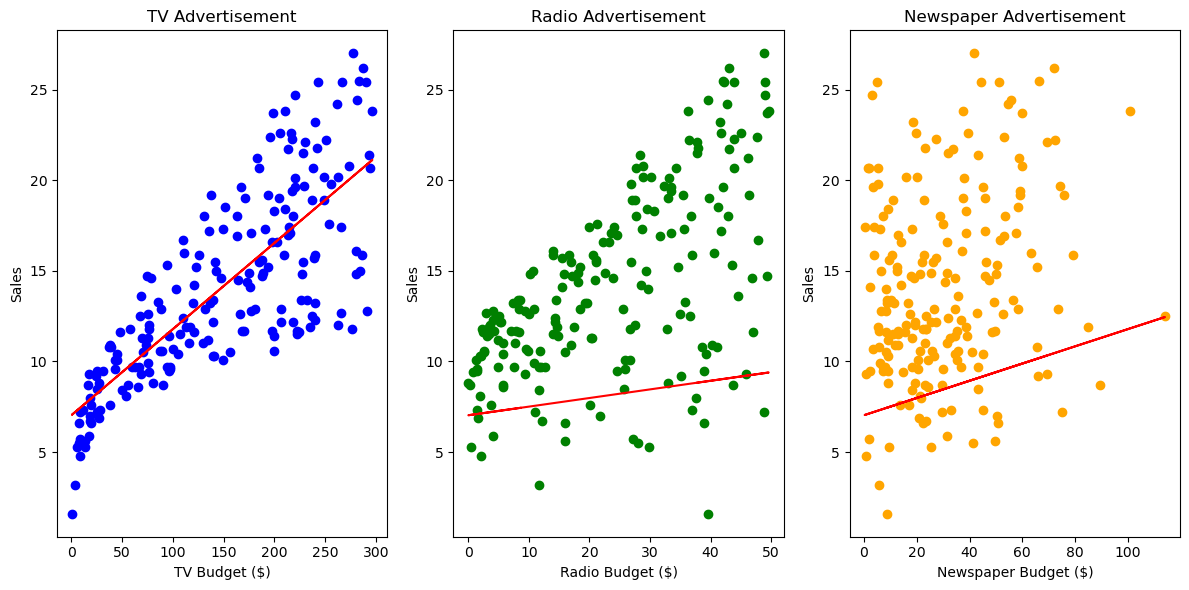

In [6]:
# Scatter plot for TV
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['sales'], color='blue')  # Use df instead of data
plt.title('TV Advertisement')
plt.xlabel('TV Budget ($)')
plt.ylabel('Sales')

# Add regression line
plt.plot(df['TV'], model.predict(sm.add_constant(df[['TV']])), color='red')  # Use df instead of data

# Scatter plot for radio
plt.subplot(1, 3, 2)
plt.scatter(df['radio'], df['sales'], color='green')  # Use df instead of data
plt.title('Radio Advertisement')
plt.xlabel('Radio Budget ($)')
plt.ylabel('Sales')

# Add regression line
plt.plot(df['radio'], model.predict(sm.add_constant(df[['radio']])), color='red')  # Use df instead of data

# Scatter plot for newspaper
plt.subplot(1, 3, 3)
plt.scatter(df['newspaper'], df['sales'], color='orange')  # Use df instead of data
plt.title('Newspaper Advertisement')
plt.xlabel('Newspaper Budget ($)')
plt.ylabel('Sales')

# Add regression line
plt.plot(df['newspaper'], model.predict(sm.add_constant(df[['newspaper']])), color='red')  # Use df instead of data

plt.tight_layout()
plt.show()


In [13]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


## R^2, t-stat, and p-value

In [7]:
# Using only one feature (TV) for simplicity
X_simple = df[['TV']]
y_simple = df['sales']

# Add a constant to the independent variable matrix
X_simple = sm.add_constant(X_simple)

# Fit the simple regression model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Print the summary of the simple regression
print("Simple Linear Regression Results:")
print(model_simple.summary())
print("\nR-squared:", model_simple.rsquared)
print("\nT-statistics:")
print(model_simple.tvalues)
print("\nP-values:")
print(model_simple.pvalues)

# Multiple Linear Regression
X_multiple = df[['TV', 'radio', 'newspaper']]

# Add a constant to the independent variable matrix
X_multiple = sm.add_constant(X_multiple)

# Fit the multiple regression model
model_multiple = sm.OLS(y_simple, X_multiple).fit()

# Print the summary of the multiple regression
print("\nMultiple Linear Regression Results:")
print(model_multiple.summary())
print("\nR-squared:", model_multiple.rsquared)
print("\nT-statistics:")
print(model_multiple.tvalues)
print("\nP-values:")
print(model_multiple.pvalues)

Simple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        02:06:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0